In [58]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings

In [59]:
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv("data.csv")

In [36]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [37]:
df['view'].unique()

array([0, 4, 1, 2, 3])

In [38]:
df = df.drop(['date', 'street', 'statezip', 'yr_renovated', 'country'], axis=1)

In [40]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,city
0,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,Shoreline
1,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,Seattle
2,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,Kent


In [41]:
df['city'] = df['city'].astype('category').cat.codes

In [42]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,city
0,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,36
1,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,35
2,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,18


In [43]:
len(df)

4600

In [44]:
df.isna().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
sqft_above       False
sqft_basement    False
yr_built         False
city             False
dtype: bool

In [45]:
df.duplicated().any()

np.False_

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  city           4600 non-null   int8   
dtypes: float64(4), int64(8), int8(1)
memory usage: 435.9 KB


In [47]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'city'],
      dtype='object')

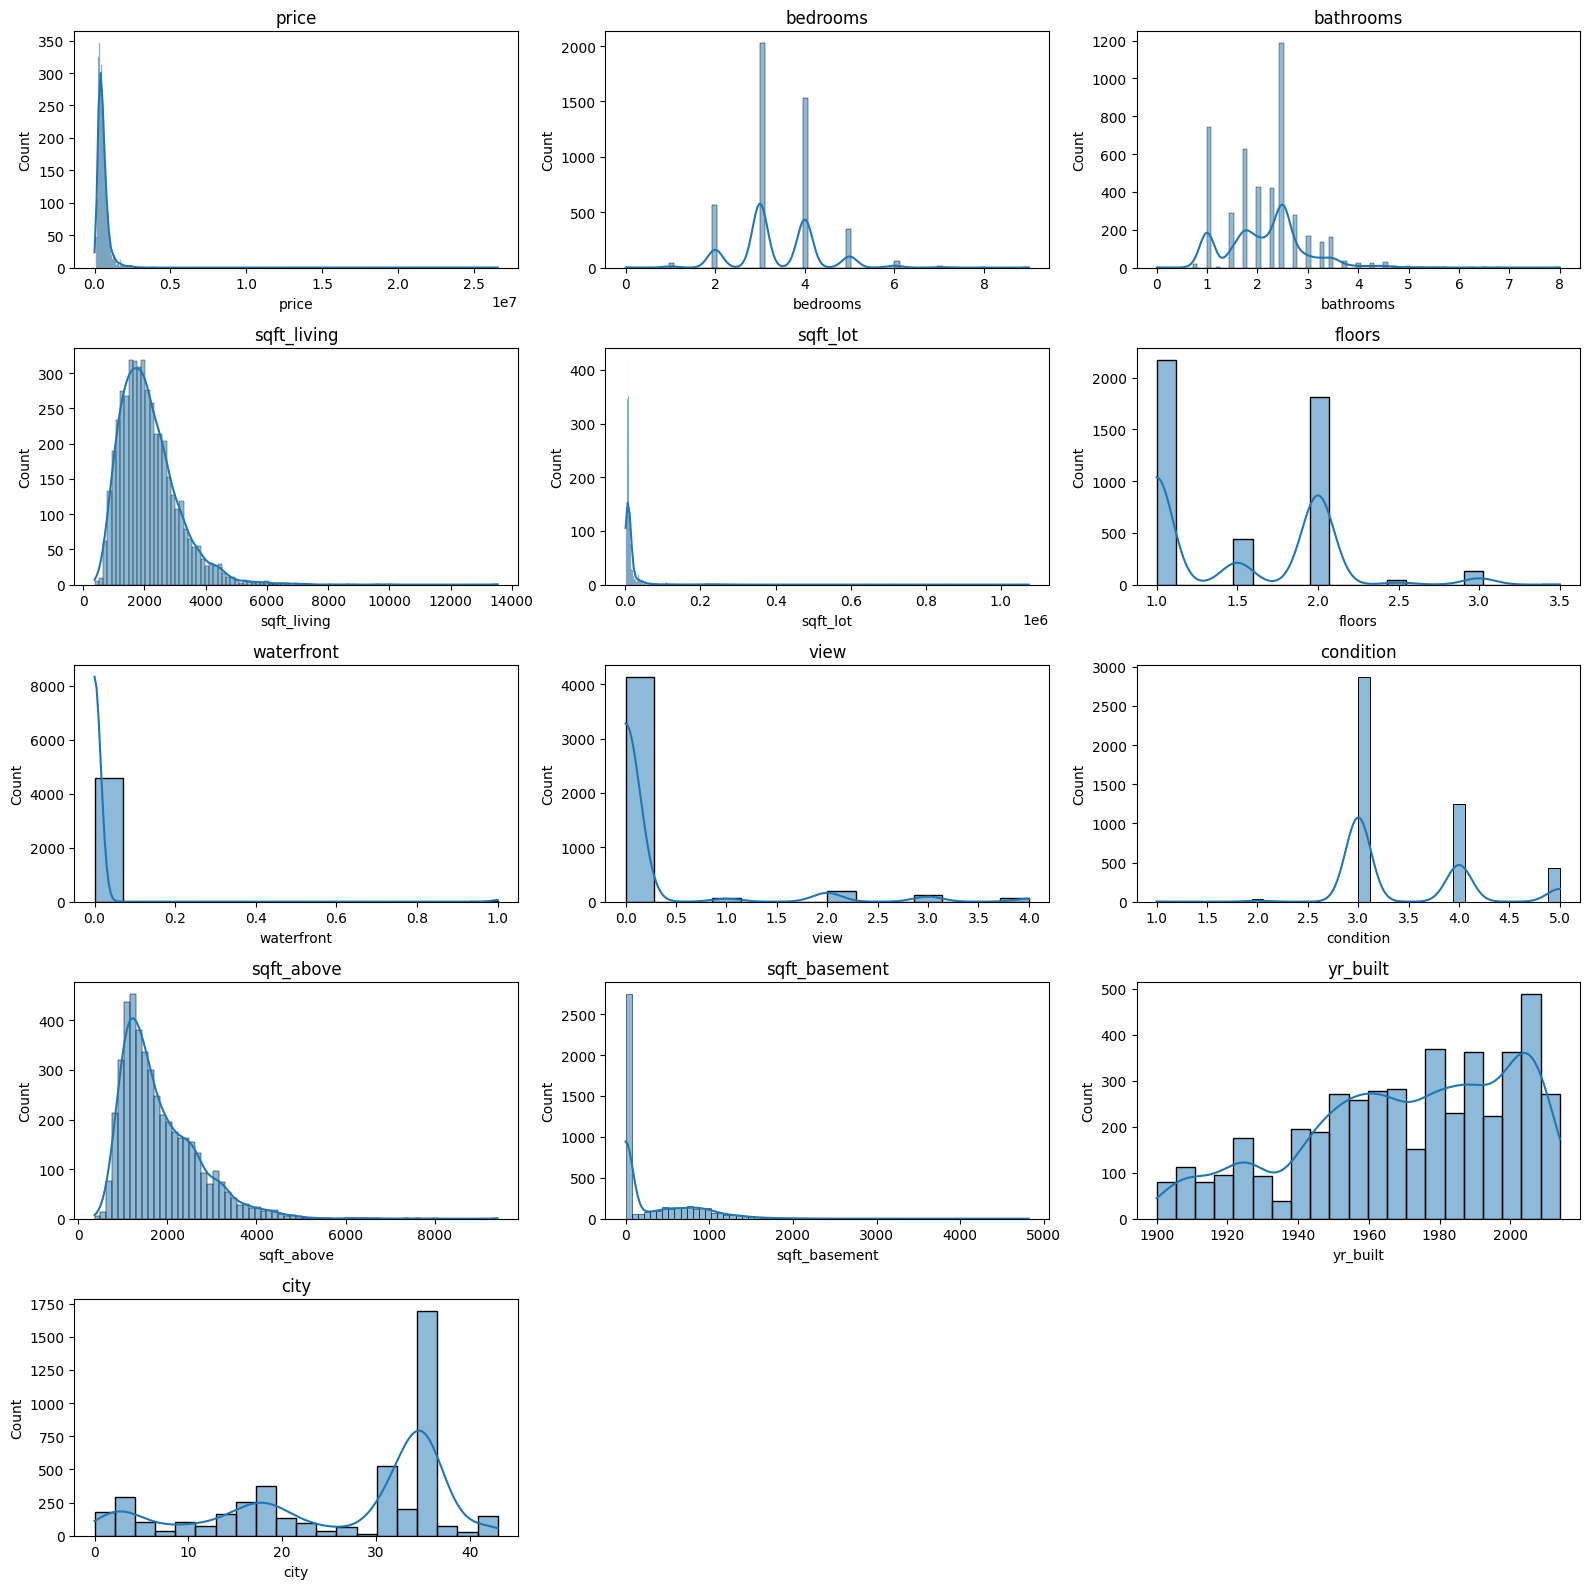

In [68]:
plt.figure(figsize=(16, 16))  # Adjusted size for more subplots

for i, col in enumerate(df.columns):
    plt.subplot(5, 3, i+1)  # 5 rows x 3 columns = 15 subplots (enough for 13)
    sns.histplot(x=col, data=df, kde=True)
    plt.title(col)  # Optional: add title for clarity

plt.tight_layout()  # Avoid overlap
plt.show()

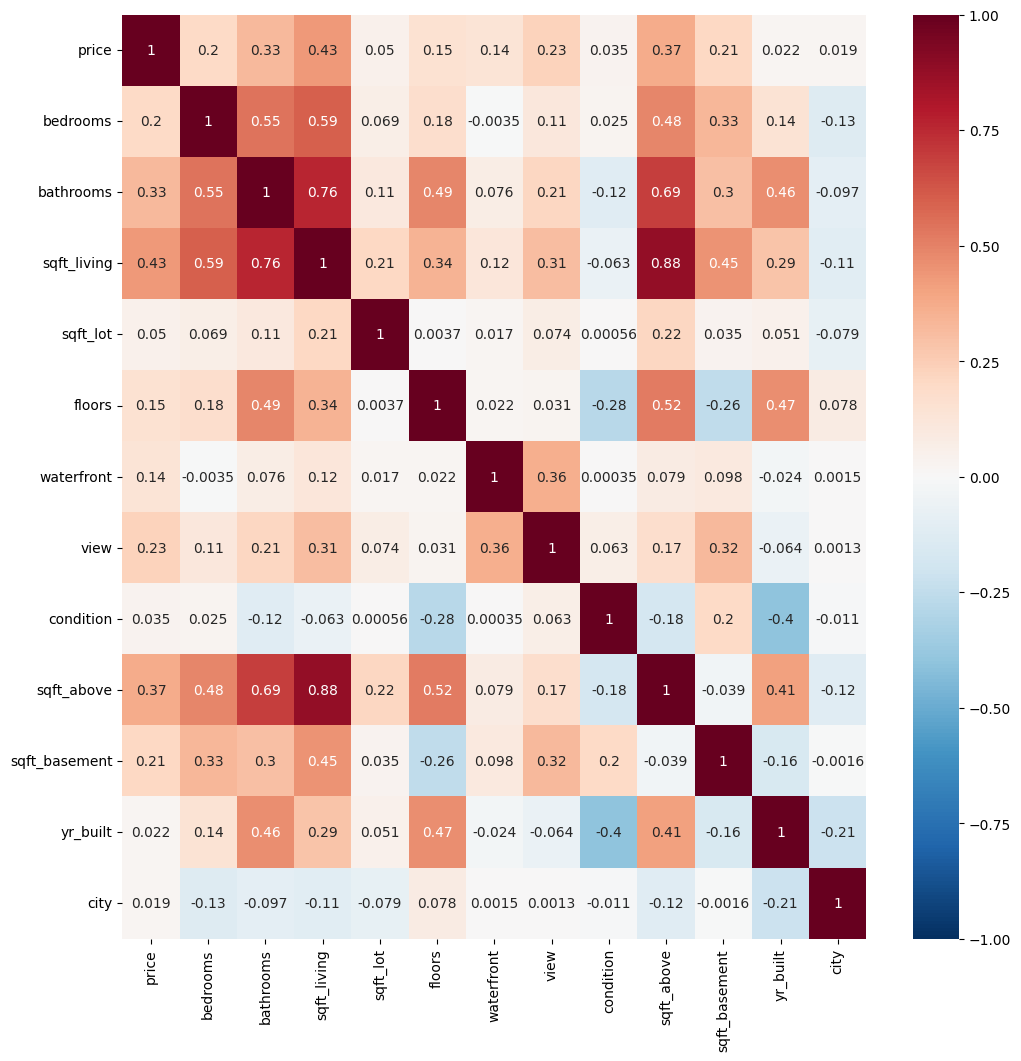

In [69]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), vmin=-1.0, center=0, cmap='RdBu_r', annot=True)
plt.show()

In [50]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,city
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,0.018625
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.130447
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.097026
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.109686
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.079135
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,0.078481
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.001450
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.001340
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.010592
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.121701


In [239]:
X = df.drop(['price'], axis=1)
y = df['price']

In [240]:
X.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,city
0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,36
1,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,35
2,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,18


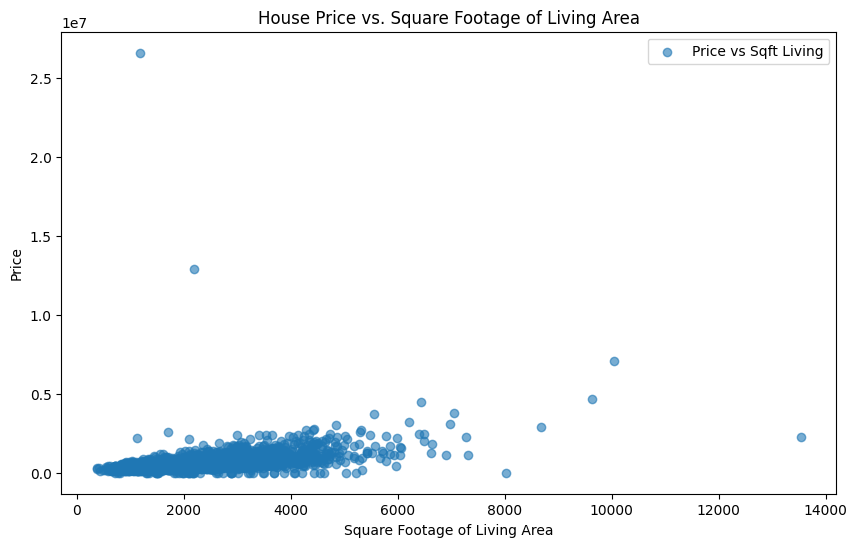

In [241]:
plt.figure(figsize=(10, 6))
plt.scatter(X['sqft_living'], y, label='Price vs Sqft Living', alpha=0.6)

plt.title('House Price vs. Square Footage of Living Area')
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price')
plt.legend()
#plt.grid(True)
plt.show()

In [242]:
#from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(degree=2, include_bias=False)
#X = poly.fit_transform(X)
#poly.get_feature_names_out()

In [246]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [247]:
np.array(X_train)

array([[4.000e+00, 2.500e+00, 2.770e+03, ..., 0.000e+00, 1.989e+03,
        4.200e+01],
       [4.000e+00, 3.000e+00, 3.720e+03, ..., 0.000e+00, 1.991e+03,
        1.900e+01],
       [4.000e+00, 2.500e+00, 2.810e+03, ..., 0.000e+00, 1.982e+03,
        3.300e+01],
       ...,
       [3.000e+00, 1.000e+00, 1.150e+03, ..., 1.600e+02, 1.932e+03,
        3.600e+01],
       [2.000e+00, 1.000e+00, 9.100e+02, ..., 0.000e+00, 1.900e+03,
        3.500e+01],
       [2.000e+00, 1.000e+00, 1.490e+03, ..., 6.300e+02, 1.929e+03,
        3.500e+01]], shape=(3680, 12))

In [248]:
# Convert to NumPy arrays
X_train = X_train.to_numpy()
X_val = X_val.to_numpy()
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()

In [249]:
np.mean(X_train, axis=0).shape

(12,)

In [250]:
mean = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)

In [251]:
X_train = (X_train - mean) / sigma
X_val = (X_val - mean) / sigma

In [252]:
def predict(x, w, b): 
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b     
    return p    

In [253]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [254]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [255]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [256]:
y_train#[8]

array([685000., 857000., 675000., ..., 290000., 600000., 475000.],
      shape=(3680,))

In [257]:
len(X_train[0])

12

In [259]:
# initialize parameters
n = len(X_train[0]) # nr of features

initial_w = np.zeros(n)
initial_b = 0.
# some gradient descent settings
iterations = 100
alpha = 5.0e-1
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 91488916690.28   
Iteration   10: Cost 33297457229.02   
Iteration   20: Cost 32318426844.64   
Iteration   30: Cost 32265030399.48   
Iteration   40: Cost 32262052209.92   
Iteration   50: Cost 32261884740.95   
Iteration   60: Cost 32261875241.57   
Iteration   70: Cost 32261874695.74   
Iteration   80: Cost 32261874663.75   
Iteration   90: Cost 32261874661.83   
b,w found by gradient descent: 544848.27,[-56201.8589778   27424.79484976 138085.54721159 -17621.83261771
  31197.20386838  32877.4702133   35072.38631221  18165.09318301
 121636.07119344  60035.48504901 -73742.55094376  18185.08568774] 
prediction: 696781.54, target value: 685000.0
prediction: 926869.05, target value: 857000.0
prediction: 701966.61, target value: 675000.0
prediction: 1013543.51, target value: 1485000.0
prediction: 683572.94, target value: 561000.0
prediction: 522652.66, target value: 506000.0
prediction: 587690.44, target value: 439000.0
prediction: 373544.00, target value: 475000.0
pr

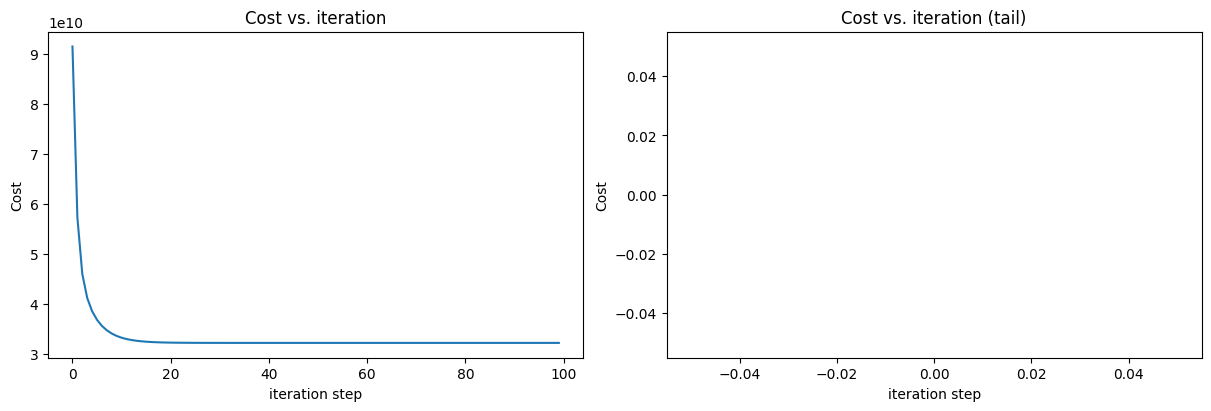

In [260]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [261]:
def r2_score(y_true, y_pred):
    num = np.sum((y_true - y_pred)**2)
    denom = np.sum((y_true - y_true.mean())**2)

    score = 1 - num / denom
    return score

In [262]:
y_predicted_train = [np.dot(i, w_final) + b_final for i in X_train]

In [263]:
r2_score(y_train, y_predicted_train).item()

0.5458820927356076

In [264]:
y_predicted_val = [np.dot(i, w_final) + b_final for i in X_val]

In [265]:
r2_score(y_val, y_predicted_val)

np.float64(0.03267206515269594)

<Axes: ylabel='Feature'>

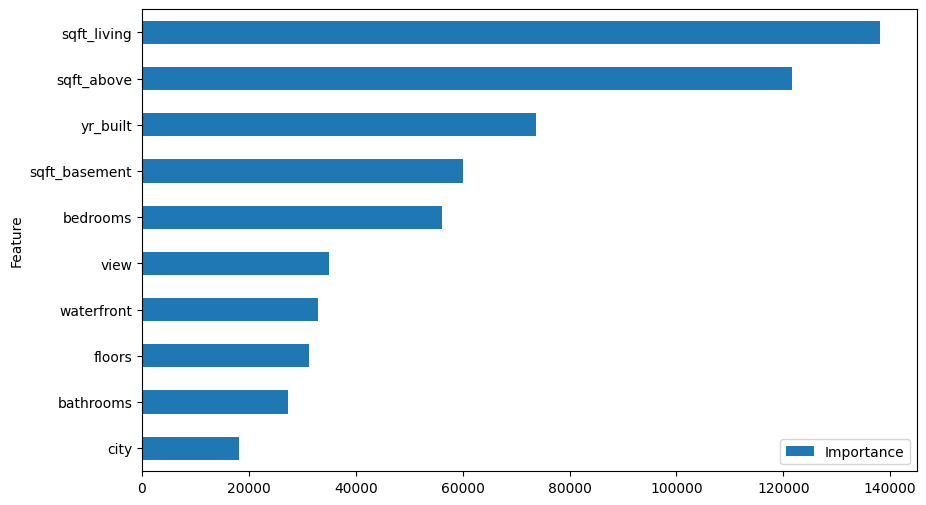

In [266]:
coefficients = copy.deepcopy(w_final)

feature_importance = pd.DataFrame({'Feature': X.columns.values , 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)[-10:]
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [233]:
feature_importance

,Feature,Importance
49,sqft_lot condition,511.546566
21,bedrooms sqft_basement,829.249003
50,sqft_lot sqft_above,1070.848195
60,floors yr_built,1172.660741
67,waterfront yr_built,1187.503775
...,...,...
87,yr_built^2,30125.529285
10,yr_built,30494.204536
38,sqft_living waterfront,32125.385619
81,sqft_above sqft_basement,32957.634352
